# Loan Default Prediction - Part 04 - Feature Reduction

This is an exploratory project for me to apply what I have learned in the Data Science and Machine Learning courses that I took this year. The data is from a Kaggle competition [Loan Default Prediction](https://www.kaggle.com/c/loan-default-prediction). 

This is Part 04 of the project: Feature Reduction. My preprocessed data has 1790 features, which is not a small number. In some of the previous experiments, it takes more than 20 minutes to fit the model. I will use three different techniques to reduce the number of features, observe the change in model performance and the time required to fit the model.

I will first load the normalized data.

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import time
import project_utils as utils

In [2]:
# Load the training data (imputed and normalized) from the CSV file

df, X_orig, y = utils.load_csv('train_v2_preprocessed_normalized.csv')# Separate training and validation sets

from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
X_train, y_train, X_valid, y_valid = utils.split_data(kf, X_orig, y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105471 entries, 0 to 105470
Columns: 1789 entries, f3 to loss
dtypes: float64(1789)
memory usage: 1.4 GB


In [3]:
# Separate features and labels, training and validation sets

from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
X_train, y_train, X_valid, y_valid = utils.split_data(kf, X_orig, y)

Time elapsed (Training): 46.6703 s
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy (Training): 0.906312
ROCAUC Score (Training): 0.736909
PRAUC Score (Training): 0.120929
Accuracy (Validation): 0.911780
ROCAUC Score (Validation): 0.712660
PRAUC Score (Validation): 0.091904
Time elapsed (Evaluation): 0.9937 s


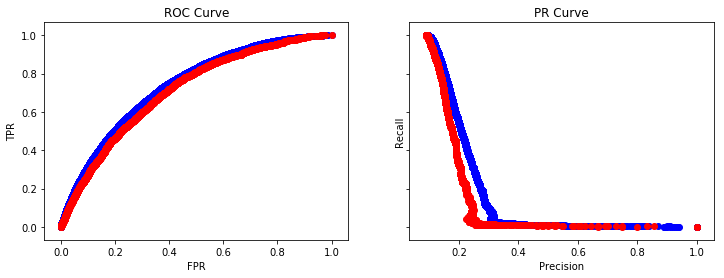

In [4]:
# Train the reference model without feature hashing

from sklearn import linear_model

clf=linear_model.LogisticRegression(C=0.01)
fit_time = utils.train_model(clf, X_train, y_train)
acc_score, rocauc_score, prauc_score, eval_time = utils.evaluate(clf, X_train, y_train, X_valid, y_valid)

## Feature Hashing

The first feature reduction technique I will try is __feature hashing__, also known as _the hashing trick_. Given a target number of features __k__, feature hashing uses a hash function to combine various original features into one column, resulting in a total of __k__ columns. It usually works well for sparse features. As I have a lot of one-hot encoded features, which are sparse, I would like to see how feature hashing works for my data set. I am using [sklearn.feature_extraction.FeatureHasher](scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.FeatureHasher.html) to do this.

In [5]:
# Define the feature hashing function

D = X_orig.to_dict(orient='records')

from sklearn.feature_extraction import FeatureHasher

def hash_features(D, k):
    start = time.time()
    
    h = FeatureHasher(n_features=k)
    X = h.transform(D)
    X = pd.DataFrame(X.toarray())
    
    end = time.time()
    hash_time = end - start
    print('Time elapsed for feature hashing: %.4f s' % hash_time)
    
    return X, hash_time

In [6]:
# Define a set of Ks to try

ks = [1000, 500, 200, 100, 50, 20]

----- k = 1000 -----
Time elapsed for feature hashing: 17.6694 s
Time elapsed (Training): 30.3673 s
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Time elapsed (Training, combined): 48.0367 s
Accuracy (Training): 0.906265
ROCAUC Score (Training): 0.730788
PRAUC Score (Training): 0.116936
Accuracy (Validation): 0.911922
ROCAUC Score (Validation): 0.709721
PRAUC Score (Validation): 0.090648
Time elapsed (Evaluation): 0.7867 s


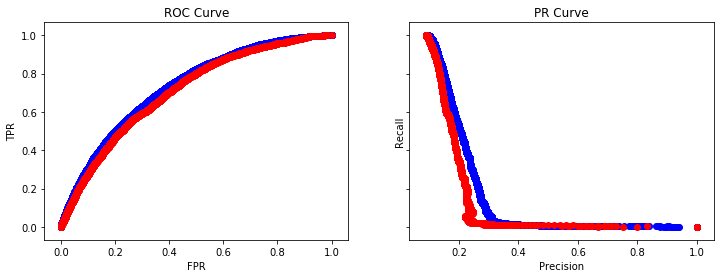

----- k = 500 -----
Time elapsed for feature hashing: 17.5104 s
Time elapsed (Training): 34.2471 s
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Time elapsed (Training, combined): 51.7575 s
Accuracy (Training): 0.906170
ROCAUC Score (Training): 0.722141
PRAUC Score (Training): 0.107472
Accuracy (Validation): 0.911733
ROCAUC Score (Validation): 0.704214
PRAUC Score (Validation): 0.086968
Time elapsed (Evaluation): 0.4938 s


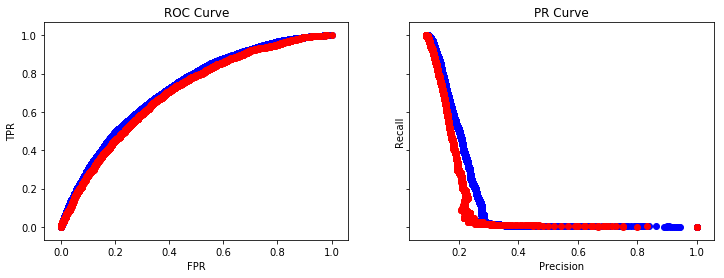

----- k = 200 -----
Time elapsed for feature hashing: 15.9119 s
Time elapsed (Training): 10.4727 s
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Time elapsed (Training, combined): 26.3846 s
Accuracy (Training): 0.906312
ROCAUC Score (Training): 0.695763
PRAUC Score (Training): 0.088067
Accuracy (Validation): 0.911970
ROCAUC Score (Validation): 0.681562
PRAUC Score (Validation): 0.071319
Time elapsed (Evaluation): 0.3679 s


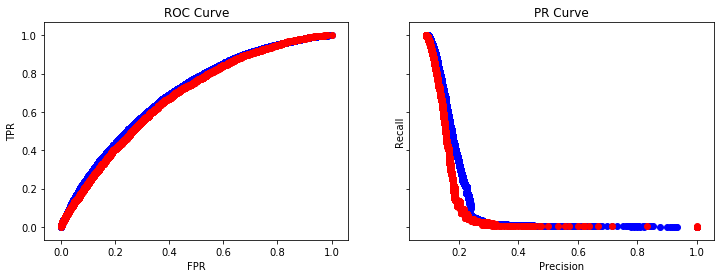

----- k = 100 -----
Time elapsed for feature hashing: 15.4241 s
Time elapsed (Training): 4.7125 s
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Time elapsed (Training, combined): 20.1366 s
Accuracy (Training): 0.906229
ROCAUC Score (Training): 0.681338
PRAUC Score (Training): 0.078178
Accuracy (Validation): 0.911970
ROCAUC Score (Validation): 0.663989
PRAUC Score (Validation): 0.061021
Time elapsed (Evaluation): 0.3949 s


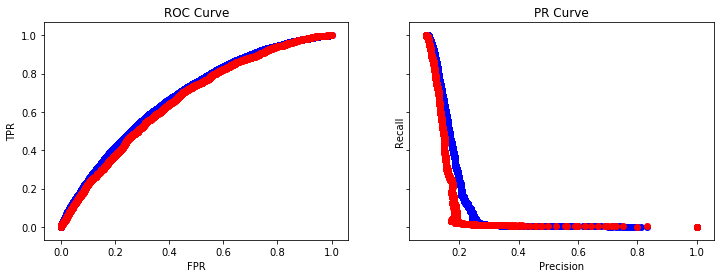

----- k = 50 -----
Time elapsed for feature hashing: 15.0912 s
Time elapsed (Training): 1.8514 s
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Time elapsed (Training, combined): 16.9426 s
Accuracy (Training): 0.906063
ROCAUC Score (Training): 0.663871
PRAUC Score (Training): 0.064064
Accuracy (Validation): 0.911543
ROCAUC Score (Validation): 0.651574
PRAUC Score (Validation): 0.064483
Time elapsed (Evaluation): 0.3669 s


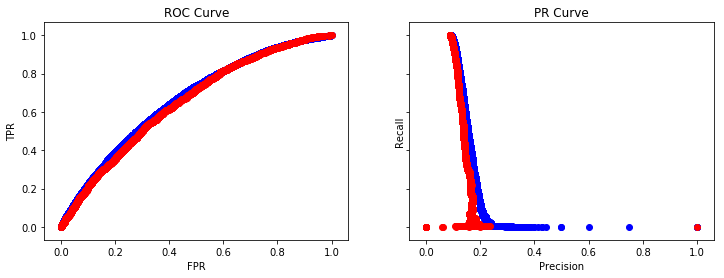

----- k = 20 -----
Time elapsed for feature hashing: 14.4974 s
Time elapsed (Training): 0.7927 s
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Time elapsed (Training, combined): 15.2901 s
Accuracy (Training): 0.906111
ROCAUC Score (Training): 0.634071
PRAUC Score (Training): 0.048402
Accuracy (Validation): 0.911827
ROCAUC Score (Validation): 0.630667
PRAUC Score (Validation): 0.042607
Time elapsed (Evaluation): 0.3329 s


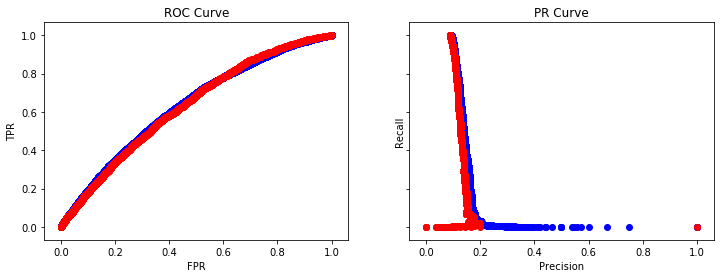

In [7]:
fit_times = []; eval_times = []; acc_scores = []; rocauc_scores = []; prauc_scores = []

for k in ks:
    print('----- k = %d -----' % k)
    
    X, hash_time = hash_features(D, k)
    X_train, y_train, X_valid, y_valid = utils.split_data(kf, X, y)
    
    clf = linear_model.LogisticRegression(C=0.01)
    fit_time = utils.train_model(clf, X_train, y_train)
    print('Time elapsed (Training, combined): %.4f s' % (hash_time + fit_time))
    acc_score, rocauc_score, prauc_score, eval_time = utils.evaluate(clf, X_train, y_train, X_valid, y_valid)
    fit_times.append(fit_time); eval_times.append(eval_time)
    acc_scores.append(acc_score); rocauc_scores.append(rocauc_score); prauc_scores.append(prauc_score)

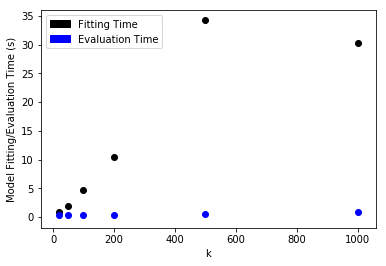

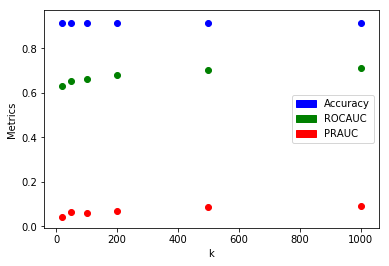

    0_k  1_Accuracy  2_ROCAUC   3_PRAUC  4_fit_time  5_eval_time
0  1000    0.911922  0.709721  0.090648   30.367327     0.786749
1   500    0.911733  0.704214  0.086968   34.247091     0.493829
2   200    0.911970  0.681562  0.071319   10.472676     0.367869
3   100    0.911970  0.663989  0.061021    4.712484     0.394874
4    50    0.911543  0.651574  0.064483    1.851411     0.366884
5    20    0.911827  0.630667  0.042607    0.792748     0.332882


               0_k  1_Accuracy  2_ROCAUC   3_PRAUC  4_fit_time  5_eval_time
count     6.000000    6.000000  6.000000  6.000000    6.000000     6.000000
mean    311.666667    0.911827  0.673621  0.069508   13.740623     0.457181
std     379.495279    0.000167  0.030744  0.017754   14.819920     0.170541
min      20.000000    0.911543  0.630667  0.042607    0.792748     0.332882
25%      62.500000    0.911756  0.654678  0.061886    2.566679     0.367131
50%     150.000000    0.911875  0.672775  0.067901    7.592580     0.381372
75%     425

In [8]:
utils.plot_metrics(ks, 'k', False, fit_times, eval_times, acc_scores, rocauc_scores, prauc_scores)

The time required to fit the model decreased significantly as the number of features goes down. However, there is some degradation in the metrics followed by the decrease of number of features. To be specific, ROCAUC gradually decreases from 0.710 to 0.631 as __k__ decreases from 1000 to 20. This perfectly illustrates the time-performance trade-off. It is worth noting that all three metrics perform the best when the number of features is the highest because more information is kept. 

## Feature Selection

I will next try __feature selection__ using the [sklearn.feature_selection.SelectKBest](scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html) library. Given the target number of features __k__ and a scoring function, it will select the top __k__ best-performing features with the highest scores. For this experiment, I will use __score_func__=__f_classif__ (ANOVA F-value) as my scoring function. I will use the same set of __k__s as the previous experiment.

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

def select_features(k, X_orig, y):
    start = time.time()
    X = SelectKBest(f_classif, k=k).fit_transform(X_orig, y)
    end = time.time()
    sel_time = end - start
    print('Time elapsed for feature selection: %.4f s' % sel_time)
    X = pd.DataFrame(X)
    return X

----- k = 1000 -----


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [615] are constant.
  UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Time elapsed for feature selection: 6.0011 s
Time elapsed (Training): 40.8730 s
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Time elapsed (Training, combined): 55.3704 s
Accuracy (Training): 0.906336
ROCAUC Score (Training): 0.729327
PRAUC Score (Training): 0.114494
Accuracy (Validation): 0.911970
ROCAUC Score (Validation): 0.711230
PRAUC Score (Validation): 0.089719
Time elapsed (Evaluation): 0.6378 s


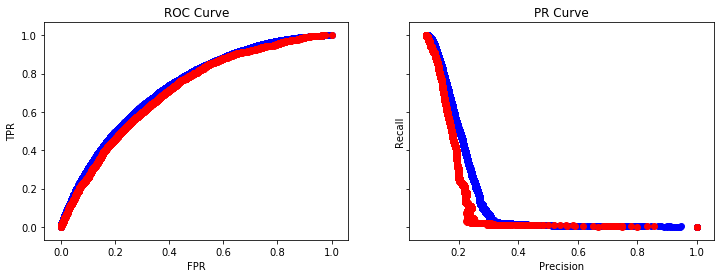

----- k = 500 -----


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [615] are constant.
  UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Time elapsed for feature selection: 5.5852 s
Time elapsed (Training): 25.3999 s
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Time elapsed (Training, combined): 39.8973 s
Accuracy (Training): 0.906312
ROCAUC Score (Training): 0.711008
PRAUC Score (Training): 0.099852
Accuracy (Validation): 0.912254
ROCAUC Score (Validation): 0.702031
PRAUC Score (Validation): 0.084175
Time elapsed (Evaluation): 0.4878 s


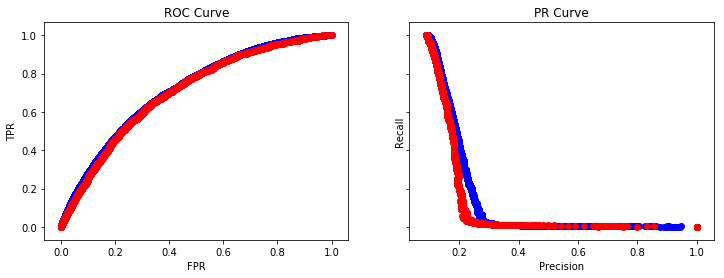

----- k = 200 -----


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [615] are constant.
  UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Time elapsed for feature selection: 5.4653 s
Time elapsed (Training): 8.1884 s
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Time elapsed (Training, combined): 22.6858 s
Accuracy (Training): 0.906111
ROCAUC Score (Training): 0.692206
PRAUC Score (Training): 0.080518
Accuracy (Validation): 0.911827
ROCAUC Score (Validation): 0.688942
PRAUC Score (Validation): 0.073363
Time elapsed (Evaluation): 0.3609 s


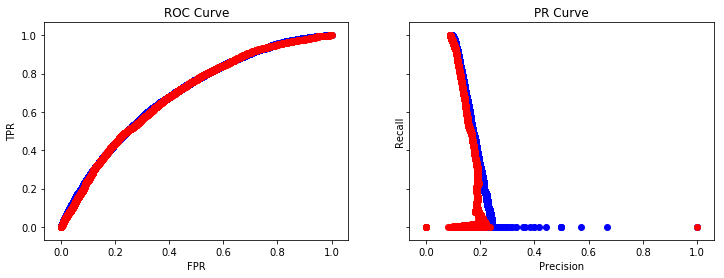

----- k = 100 -----


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [615] are constant.
  UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Time elapsed for feature selection: 5.5412 s
Time elapsed (Training): 3.3119 s
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Time elapsed (Training, combined): 17.8093 s
Accuracy (Training): 0.906111
ROCAUC Score (Training): 0.688449
PRAUC Score (Training): 0.077189
Accuracy (Validation): 0.911827
ROCAUC Score (Validation): 0.685137
PRAUC Score (Validation): 0.111731
Time elapsed (Evaluation): 0.2959 s


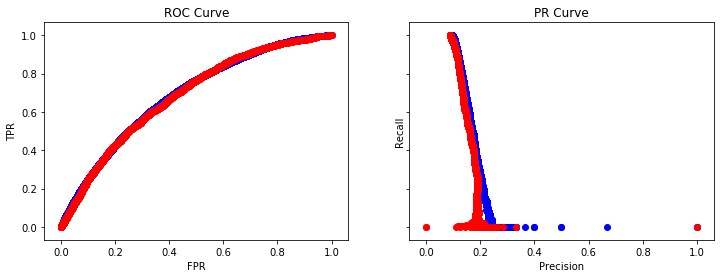

----- k = 50 -----


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [615] are constant.
  UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Time elapsed for feature selection: 5.5752 s
Time elapsed (Training): 1.8514 s
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Time elapsed (Training, combined): 16.3488 s
Accuracy (Training): 0.906099
ROCAUC Score (Training): 0.655986
PRAUC Score (Training): 0.060153
Accuracy (Validation): 0.911827
ROCAUC Score (Validation): 0.656752
PRAUC Score (Validation): 0.051539
Time elapsed (Evaluation): 0.3239 s


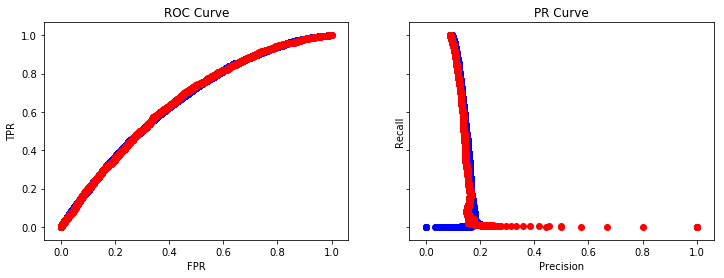

----- k = 20 -----


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [615] are constant.
  UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Time elapsed for feature selection: 5.5972 s
Time elapsed (Training): 0.6048 s
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Time elapsed (Training, combined): 15.1022 s
Accuracy (Training): 0.906099
ROCAUC Score (Training): 0.641072
PRAUC Score (Training): 0.044584
Accuracy (Validation): 0.911827
ROCAUC Score (Validation): 0.651522
PRAUC Score (Validation): 0.048407
Time elapsed (Evaluation): 0.3469 s


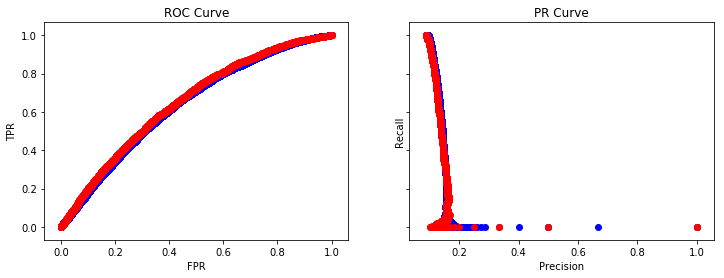

In [10]:
fit_times = []; eval_times = []; acc_scores = []; rocauc_scores = []; prauc_scores = []

for k in ks:    
    print('----- k = %d -----' % k)
    
    X = select_features(k, X_orig, y)
    X_train, y_train, X_valid, y_valid = utils.split_data(kf, X, y)
    
    clf = linear_model.LogisticRegression(C=0.01)
    fit_time = utils.train_model(clf, X_train, y_train)
    print('Time elapsed (Training, combined): %.4f s' % (hash_time + fit_time))
    acc_score, rocauc_score, prauc_score, eval_time = utils.evaluate(clf, X_train, y_train, X_valid, y_valid)
    fit_times.append(fit_time); eval_times.append(eval_time)
    acc_scores.append(acc_score); rocauc_scores.append(rocauc_score); prauc_scores.append(prauc_score)

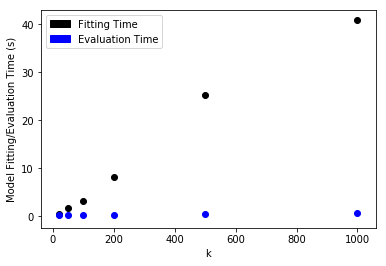

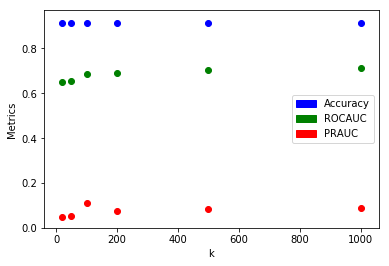

    0_k  1_Accuracy  2_ROCAUC   3_PRAUC  4_fit_time  5_eval_time
0  1000    0.911970  0.711230  0.089719   40.872993     0.637784
1   500    0.912254  0.702031  0.084175   25.399909     0.487846
2   200    0.911827  0.688942  0.073363    8.188405     0.360870
3   100    0.911827  0.685137  0.111731    3.311947     0.295907
4    50    0.911827  0.656752  0.051539    1.851410     0.323896
5    20    0.911827  0.651522  0.048407    0.604822     0.346876


               0_k  1_Accuracy  2_ROCAUC   3_PRAUC  4_fit_time  5_eval_time
count     6.000000    6.000000  6.000000  6.000000    6.000000     6.000000
mean    311.666667    0.911922  0.682602  0.076489   13.371581     0.408863
std     379.495279    0.000172  0.023991  0.024071   16.277434     0.130205
min      20.000000    0.911827  0.651522  0.048407    0.604822     0.295907
25%      62.500000    0.911827  0.663848  0.056995    2.216544     0.329641
50%     150.000000    0.911827  0.687039  0.078769    5.750176     0.353873
75%     425

In [11]:
utils.plot_metrics(ks, 'k', False, fit_times, eval_times, acc_scores, rocauc_scores, prauc_scores)

In this experiment, ROCAUC gradually decreases from 0.711 to 0.652 as k decreases from 1000 to 20. As feature selection keeps only the __k__ best features and drops the rest, all the information from the dropped features are lost. Therefore, the degradation of the performance of the metrics is more pronounced than that of feature hashing. However, as the information provided by each feature is taken into account, a larger number of features doesn't necessarily mean better quality. For example, PRAUC is highest at __k__=100.

## PCA

__PCA (Principal Component Analysis)__ is the third technique I would like to apply. PCA tranforms the features with a new basis that explains the most variance in the feature space. Selecting the top __k__ principal components has a similar effect to selecting k best features, except that all features are mapped into a new space instead of remaining in the original form.

In [12]:
from sklearn.decomposition import PCA

def pca(k, X_orig, y):
    start = time.time()
    X = PCA(n_components=k).fit_transform(X_orig, y)
    end = time.time()
    sel_time = end - start
    print('Time elapsed for feature selection: %.4f s' % sel_time)
    X = pd.DataFrame(X)
    return X

----- k = 1000 -----
Time elapsed for feature selection: 53.8819 s
Time elapsed (Training): 61.6804 s
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Time elapsed (Training, combined): 76.1777 s
Accuracy (Training): 0.906348
ROCAUC Score (Training): 0.737699
PRAUC Score (Training): 0.121734
Accuracy (Validation): 0.911780
ROCAUC Score (Validation): 0.713479
PRAUC Score (Validation): 0.092523
Time elapsed (Evaluation): 0.6438 s


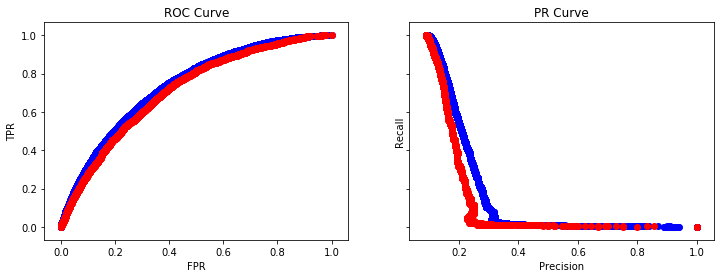

----- k = 500 -----
Time elapsed for feature selection: 24.5032 s
Time elapsed (Training): 26.3366 s
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Time elapsed (Training, combined): 40.8340 s
Accuracy (Training): 0.906265
ROCAUC Score (Training): 0.732471
PRAUC Score (Training): 0.116719
Accuracy (Validation): 0.911780
ROCAUC Score (Validation): 0.712016
PRAUC Score (Validation): 0.090823
Time elapsed (Evaluation): 0.4808 s


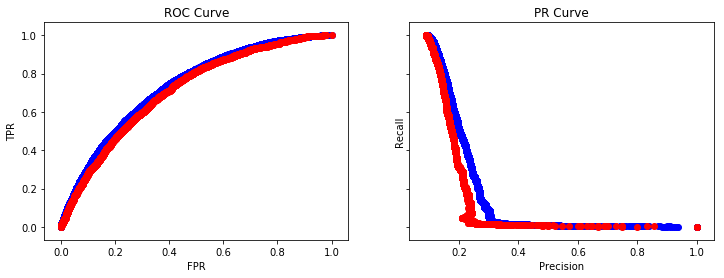

----- k = 200 -----
Time elapsed for feature selection: 10.4857 s
Time elapsed (Training): 6.9358 s
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Time elapsed (Training, combined): 21.4332 s
Accuracy (Training): 0.906383
ROCAUC Score (Training): 0.707652
PRAUC Score (Training): 0.099697
Accuracy (Validation): 0.912017
ROCAUC Score (Validation): 0.693763
PRAUC Score (Validation): 0.081113
Time elapsed (Evaluation): 0.4229 s


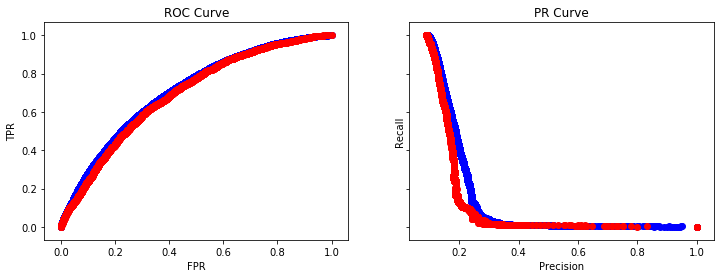

----- k = 100 -----
Time elapsed for feature selection: 9.4130 s
Time elapsed (Training): 3.2700 s
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Time elapsed (Training, combined): 17.7673 s
Accuracy (Training): 0.906348
ROCAUC Score (Training): 0.689480
PRAUC Score (Training): 0.085455
Accuracy (Validation): 0.912064
ROCAUC Score (Validation): 0.677527
PRAUC Score (Validation): 0.069277
Time elapsed (Evaluation): 0.3799 s


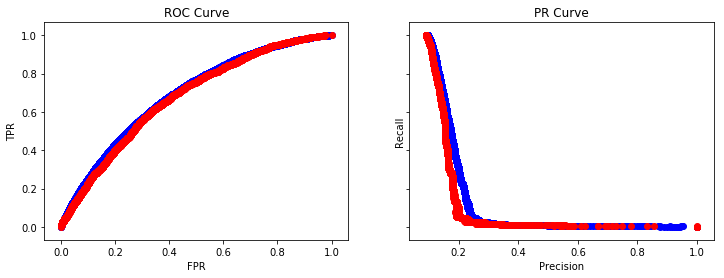

----- k = 50 -----
Time elapsed for feature selection: 6.8648 s
Time elapsed (Training): 1.8044 s
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Time elapsed (Training, combined): 16.3018 s
Accuracy (Training): 0.906099
ROCAUC Score (Training): 0.679374
PRAUC Score (Training): 0.072914
Accuracy (Validation): 0.911827
ROCAUC Score (Validation): 0.671271
PRAUC Score (Validation): 0.060138
Time elapsed (Evaluation): 0.3679 s


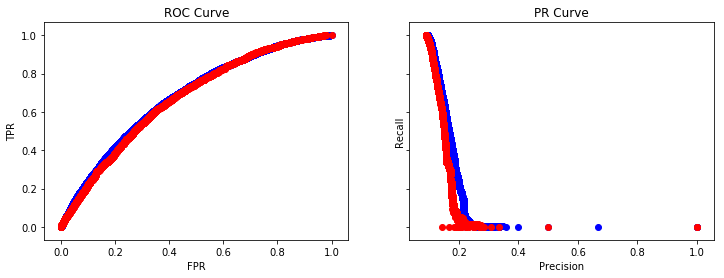

----- k = 20 -----
Time elapsed for feature selection: 5.4883 s
Time elapsed (Training): 0.7698 s
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Time elapsed (Training, combined): 15.2671 s
Accuracy (Training): 0.906099
ROCAUC Score (Training): 0.662016
PRAUC Score (Training): 0.059152
Accuracy (Validation): 0.911827
ROCAUC Score (Validation): 0.657354
PRAUC Score (Validation): 0.097132
Time elapsed (Evaluation): 0.3319 s


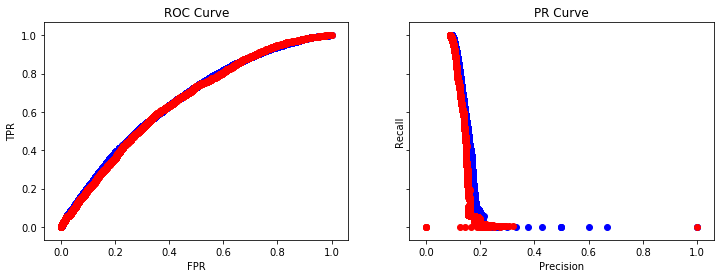

In [13]:
fit_times = []; eval_times = []; acc_scores = []; rocauc_scores = []; prauc_scores = []

for k in ks:    
    print('----- k = %d -----' % k)
    
    X = pca(k, X_orig, y)
    X_train, y_train, X_valid, y_valid = utils.split_data(kf, X, y)
    
    clf = linear_model.LogisticRegression(C=0.01)
    fit_time = utils.train_model(clf, X_train, y_train)
    print('Time elapsed (Training, combined): %.4f s' % (hash_time + fit_time))
    acc_score, rocauc_score, prauc_score, eval_time = utils.evaluate(clf, X_train, y_train, X_valid, y_valid)
    fit_times.append(fit_time); eval_times.append(eval_time)
    acc_scores.append(acc_score); rocauc_scores.append(rocauc_score); prauc_scores.append(prauc_score)

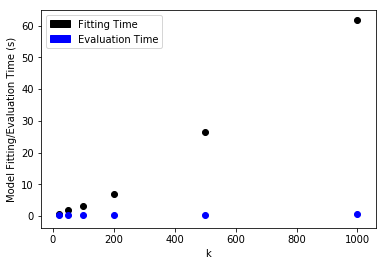

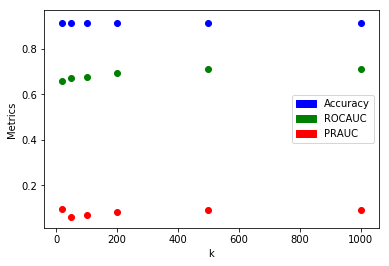

    0_k  1_Accuracy  2_ROCAUC   3_PRAUC  4_fit_time  5_eval_time
0  1000    0.911780  0.713479  0.092523   61.680362     0.643795
1   500    0.911780  0.712016  0.090823   26.336608     0.480847
2   200    0.912017  0.693763  0.081113    6.935776     0.422866
3   100    0.912064  0.677527  0.069277    3.269958     0.379880
4    50    0.911827  0.671271  0.060138    1.804427     0.367881
5    20    0.911827  0.657354  0.097132    0.769755     0.331892


               0_k  1_Accuracy  2_ROCAUC   3_PRAUC  4_fit_time  5_eval_time
count     6.000000    6.000000  6.000000  6.000000    6.000000     6.000000
mean    311.666667    0.911883  0.687568  0.081834   16.799481     0.437860
std     379.495279    0.000125  0.022745  0.014547   23.947421     0.113110
min      20.000000    0.911780  0.657354  0.060138    0.769755     0.331892
25%      62.500000    0.911792  0.672835  0.072236    2.170809     0.370881
50%     150.000000    0.911827  0.685645  0.085968    5.102867     0.401373
75%     425

In [14]:
utils.plot_metrics(ks, 'k', False, fit_times, eval_times, acc_scores, rocauc_scores, prauc_scores)

In this experiment, ROCAUC gradually decreases from 0.713 to 0.657 as k decreases from 1000 to 20. The larger __k__ is, the better the performance of the model.